In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing required libraries
import csv
import pandas as pd
import numpy as np
from collections import defaultdict

In [ ]:
# Reading Raw Dataset
df = pd.read_excel('/content/drive/MyDrive/raw_data.xlsx')

In [ ]:
#Displaying the uploaded dataset in the data frame
df.head()

Disease  Count of Disease Occurrence  \
0  UMLS:C0020538_hypertensive disease                       3363.0   
1                                 NaN                          NaN   
2                                 NaN                          NaN   
3                                 NaN                          NaN   
4                                 NaN                          NaN   

                             Symptom  
0           UMLS:C0008031_pain chest  
1  UMLS:C0392680_shortness of breath  
2            UMLS:C0012833_dizziness  
3             UMLS:C0004093_asthenia  
4                 UMLS:C0085639_fall

In [ ]:
# Fill all NaN with the values above
data = df.fillna(method='ffill')

In [ ]:
#Displaying dataset with replaced values of NaN
data.head()

Disease  Count of Disease Occurrence  \
0  UMLS:C0020538_hypertensive disease                       3363.0   
1  UMLS:C0020538_hypertensive disease                       3363.0   
2  UMLS:C0020538_hypertensive disease                       3363.0   
3  UMLS:C0020538_hypertensive disease                       3363.0   
4  UMLS:C0020538_hypertensive disease                       3363.0   

                             Symptom  
0           UMLS:C0008031_pain chest  
1  UMLS:C0392680_shortness of breath  
2            UMLS:C0012833_dizziness  
3             UMLS:C0004093_asthenia  
4                 UMLS:C0085639_fall

In [ ]:
# Process Disease and Symptom Names
def process_data(data):
    data_list = []
    data_name = data.replace('^','_').split('_') #For readability 
    n = 1
    for names in data_name:
        if (n % 2 == 0):
            data_list.append(names)
        n += 1
    return data_list

In [ ]:
# Data Cleanup
disease_list = []
disease_symptom_dict = defaultdict(list)
disease_symptom_count = {}
count = 0

for idx, row in data.iterrows():
    
    # Get the Disease Names
    if (row['Disease'] !="\xc2\xa0") and (row['Disease'] != ""):
        disease = row['Disease']
        disease_list = process_data(data=disease)
        count = row['Count of Disease Occurrence']

    # Get the Symptoms Corresponding to Diseases
    if (row['Symptom'] !="\xc2\xa0") and (row['Symptom'] != ""):
        symptom = row['Symptom']
        symptom_list = process_data(data=symptom)
        for d in disease_list:
            for s in symptom_list:
                disease_symptom_dict[d].append(s)
            disease_symptom_count[d] = count

In [ ]:
# See that the data is Processed Correctly
i=int(0)
for key in disease_symptom_dict.keys():
  print(key,disease_symptom_dict[key])
  i=i+1
  if i>10:
    break

hypertensive disease ['pain chest', 'shortness of breath', 'dizziness', 'asthenia', 'fall', 'syncope', 'vertigo', 'sweat', 'sweating increased', 'palpitation', 'nausea', 'angina pectoris', 'pressure chest']
diabetes ['polyuria', 'polydypsia', 'shortness of breath', 'pain chest', 'asthenia', 'nausea', 'orthopnea', 'rale', 'sweat', 'sweating increased', 'unresponsiveness', 'mental status changes', 'vertigo', 'vomiting', 'labored breathing']
depression mental ['feeling suicidal', 'suicidal', 'hallucinations auditory', 'feeling hopeless', 'weepiness', 'sleeplessness', 'motor retardation', 'irritable mood', 'blackout', 'mood depressed', 'hallucinations visual', 'worry', 'agitation', 'tremor', 'intoxication', 'verbal auditory hallucinations', 'energy increased', 'difficulty', 'nightmare', 'unable to concentrate', 'homelessness']
depressive disorder ['feeling suicidal', 'suicidal', 'hallucinations auditory', 'feeling hopeless', 'weepiness', 'sleeplessness', 'motor retardation', 'irritable moo

In [ ]:
# Count of Disease Occurence w.r.t each Disease
disease_symptom_count

{'hypertensive disease': 3363.0,
 'diabetes': 1421.0,
 'depression mental': 1337.0,
 'depressive disorder': 1337.0,
 'coronary arteriosclerosis': 1284.0,
 'coronary heart disease': 1284.0,
 'pneumonia': 1029.0,
 'failure heart congestive': 963.0,
 'accident\xa0cerebrovascular': 885.0,
 'asthma': 835.0,
 'myocardial infarction': 759.0,
 'hypercholesterolemia': 685.0,
 'infection': 630.0,
 'infection urinary tract': 597.0,
 'anemia': 544.0,
 'chronic obstructive airway disease': 524.0,
 'dementia': 504.0,
 'insufficiency renal': 445.0,
 'confusion': 408.0,
 'degenerative\xa0polyarthritis': 405.0,
 'hypothyroidism': 398.0,
 'anxiety state': 390.0,
 'malignant neoplasms': 354.0,
 'primary malignant neoplasm': 354.0,
 'acquired\xa0immuno-deficiency syndrome': 350.0,
 'HIV': 350.0,
 'hiv infections': 350.0,
 'cellulitis': 341.0,
 'gastroesophageal reflux disease': 325.0,
 'septicemia': 311.0,
 'systemic infection': 311.0,
 'sepsis (invertebrate)': 311.0,
 'deep vein thrombosis': 310.0,
 'deh

In [ ]:
# Save cleaned data as CSV
f = open('raw_data.csv', 'w')

with f:
    writer = csv.writer(f)
    for key, val in disease_symptom_dict.items():
        for i in range(len(val)):
            writer.writerow([key, val[i], disease_symptom_count[key]])

In [ ]:
# Read Cleaned Data as DF
df = pd.read_csv('raw_data.csv')
df.columns = ['disease', 'symptom', 'occurence_count']
df.head()

disease              symptom  occurence_count
0  hypertensive disease  shortness of breath           3363.0
1  hypertensive disease            dizziness           3363.0
2  hypertensive disease             asthenia           3363.0
3  hypertensive disease                 fall           3363.0
4  hypertensive disease              syncope           3363.0

In [ ]:
df.shape

(2129, 3)

In [ ]:
# Remove any rows with empty values
df.replace(float('nan'), np.nan, inplace=True)
df.dropna(inplace=True)

In [ ]:
df.shape #No row has an empty value so the dimensions remain the same

(2126, 3)

In [ ]:
from sklearn import preprocessing

In [ ]:
n_unique = len(df['symptom'].unique())
n_unique 
#Gives the number of unique symptoms present in the df

404

In [ ]:
df.dtypes #metadata

disease             object
symptom             object
occurence_count    float64
dtype: object

In [ ]:
# Encode the Labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['symptom'])
print(integer_encoded)
#print(max(integer_encoded))
#print(min(integer_encoded))

[328  87  28 ... 361 130 122]


In [ ]:
# One Hot Encode the Labels
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
onehot_encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
len(onehot_encoded[0]) #Unique Symptoms

404

In [ ]:
cols = np.asarray(df['symptom'].unique())
cols

array(['shortness of breath', 'dizziness', 'asthenia', 'fall', 'syncope',
       'vertigo', 'sweat', 'sweating increased', 'palpitation', 'nausea',
       'angina pectoris', 'pressure chest', 'polyuria', 'polydypsia',
       'pain chest', 'orthopnea', 'rale', 'unresponsiveness',
       'mental status changes', 'vomiting', 'labored breathing',
       'feeling suicidal', 'suicidal', 'hallucinations auditory',
       'feeling hopeless', 'weepiness', 'sleeplessness',
       'motor retardation', 'irritable mood', 'blackout',
       'mood depressed', 'hallucinations visual', 'worry', 'agitation',
       'tremor', 'intoxication', 'verbal auditory hallucinations',
       'energy increased', 'difficulty', 'nightmare',
       'unable to concentrate', 'homelessness', 'hypokinesia',
       'dyspnea on exertion', 'chest tightness', 'cough', 'fever',
       'decreased translucency', 'productive cough', 'pleuritic pain',
       'yellow sputum', 'breath sounds decreased', 'chill', 'rhonchus',
       '

In [ ]:
# Create a new dataframe to save OHE labels
df_ohe = pd.DataFrame(columns = cols)
df_ohe.head()

Empty DataFrame
Columns: [shortness of breath, dizziness, asthenia, fall, syncope, vertigo, sweat, sweating increased, palpitation, nausea, angina pectoris, pressure chest, polyuria, polydypsia, pain chest, orthopnea, rale, unresponsiveness, mental status changes, vomiting, labored breathing, feeling suicidal, suicidal, hallucinations auditory, feeling hopeless, weepiness, sleeplessness, motor retardation, irritable mood, blackout, mood depressed, hallucinations visual, worry, agitation, tremor, intoxication, verbal auditory hallucinations, energy increased, difficulty, nightmare, unable to concentrate, homelessness, hypokinesia, dyspnea on exertion, chest tightness, cough, fever, decreased translucency, productive cough, pleuritic pain, yellow sputum, breath sounds decreased, chill, rhonchus, green sputum, non-productive cough, wheezing, haemoptysis, distress respiratory, tachypnea, malaise, night sweat, jugular venous distention, dyspnea, dysarthria, speech slurred, facial paresis, hemiplegia, seizure, numbness, symptom aggravating factors, st segment elevation, st segment depression, t wave inverted, presence of q wave, chest discomfort, bradycardia, pain, nonsmoker, erythema, hepatosplenomegaly, pruritus, diarrhea, abscess bacterial, swelling, apyrexial, dysuria, hematuria, renal angle tenderness, lethargy, hyponatremia, hemodynamically stable, difficulty passing urine, consciousness clear, guaiac positive, monoclonal, ecchymosis, tumor cell invasion, haemorrhage, pallor, ...]
Index: []

[0 rows x 404 columns]

In [ ]:
for i in range(len(onehot_encoded)):
    df_ohe.loc[i] = onehot_encoded[i]

In [ ]:
df_ohe.head()

shortness of breath  dizziness  asthenia  fall  syncope  vertigo  sweat  \
0                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
1                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
2                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
3                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
4                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   

   sweating increased  palpitation  nausea  ...  feces in rectum  prodrome  \
0                 0.0          0.0     0.0  ...              0.0       0.0   
1                 0.0          0.0     0.0  ...              0.0       0.0   
2                 0.0          0.0     0.0  ...              0.0       0.0   
3                 0.0          0.0     0.0  ...              0.0       0.0   
4                 0.0          0.0     0.0  ...              0.0       0.0   

   hypoproteinemia  alcohol binge episode  abdomen acute  air fluid level  \
0              0.0                    0.0            0.0              0.0   
1              0.0                    0.0            0.0              0.0   
2              0.0                    0.0            0.0              0.0   
3              0.0                    0.0            0.0              0.0   
4              0.0                    0.0            0.0              0.0   

   catching breath  large-for-dates fetus  immobile  homicidal thoughts  
0              0.0                    0.0       0.0                 0.0  
1              0.0                    0.0       0.0                 0.0  
2              0.0                    0.0       0.0                 0.0  
3              0.0                    0.0       0.0                 0.0  
4              0.0                    0.0       0.0                 0.0  

[5 rows x 404 columns]

In [ ]:
len(df_ohe)

2126

In [ ]:
# Disease Dataframe
df_disease = df['disease']
df_disease.head()

0    hypertensive disease
1    hypertensive disease
2    hypertensive disease
3    hypertensive disease
4    hypertensive disease
Name: disease, dtype: object

In [ ]:
# Concatenate OHE Labels with the Disease Column
df_concat = pd.concat([df_disease,df_ohe], axis=1)
df_concat.head()

disease  shortness of breath  dizziness  asthenia  fall  \
0  hypertensive disease                  0.0        0.0       0.0   0.0   
1  hypertensive disease                  0.0        0.0       0.0   0.0   
2  hypertensive disease                  0.0        0.0       0.0   0.0   
3  hypertensive disease                  0.0        0.0       0.0   0.0   
4  hypertensive disease                  0.0        0.0       0.0   0.0   

   syncope  vertigo  sweat  sweating increased  palpitation  ...  \
0      0.0      0.0    0.0                 0.0          0.0  ...   
1      0.0      0.0    0.0                 0.0          0.0  ...   
2      0.0      0.0    0.0                 0.0          0.0  ...   
3      0.0      0.0    0.0                 0.0          0.0  ...   
4      0.0      0.0    0.0                 0.0          0.0  ...   

   feces in rectum  prodrome  hypoproteinemia  alcohol binge episode  \
0              0.0       0.0              0.0                    0.0   
1              0.0       0.0              0.0                    0.0   
2              0.0       0.0              0.0                    0.0   
3              0.0       0.0              0.0                    0.0   
4              0.0       0.0              0.0                    0.0   

   abdomen acute  air fluid level  catching breath  large-for-dates fetus  \
0            0.0              0.0              0.0                    0.0   
1            0.0              0.0              0.0                    0.0   
2            0.0              0.0              0.0                    0.0   
3            0.0              0.0              0.0                    0.0   
4            0.0              0.0              0.0                    0.0   

   immobile  homicidal thoughts  
0       0.0                 0.0  
1       0.0                 0.0  
2       0.0                 0.0  
3       0.0                 0.0  
4       0.0                 0.0  

[5 rows x 405 columns]

In [ ]:
df_concat.drop_duplicates(keep='first',inplace=True)

In [ ]:
df_concat.head()

disease  shortness of breath  dizziness  asthenia  fall  \
0  hypertensive disease                  0.0        0.0       0.0   0.0   
1  hypertensive disease                  0.0        0.0       0.0   0.0   
2  hypertensive disease                  0.0        0.0       0.0   0.0   
3  hypertensive disease                  0.0        0.0       0.0   0.0   
4  hypertensive disease                  0.0        0.0       0.0   0.0   

   syncope  vertigo  sweat  sweating increased  palpitation  ...  \
0      0.0      0.0    0.0                 0.0          0.0  ...   
1      0.0      0.0    0.0                 0.0          0.0  ...   
2      0.0      0.0    0.0                 0.0          0.0  ...   
3      0.0      0.0    0.0                 0.0          0.0  ...   
4      0.0      0.0    0.0                 0.0          0.0  ...   

   feces in rectum  prodrome  hypoproteinemia  alcohol binge episode  \
0              0.0       0.0              0.0                    0.0   
1              0.0       0.0              0.0                    0.0   
2              0.0       0.0              0.0                    0.0   
3              0.0       0.0              0.0                    0.0   
4              0.0       0.0              0.0                    0.0   

   abdomen acute  air fluid level  catching breath  large-for-dates fetus  \
0            0.0              0.0              0.0                    0.0   
1            0.0              0.0              0.0                    0.0   
2            0.0              0.0              0.0                    0.0   
3            0.0              0.0              0.0                    0.0   
4            0.0              0.0              0.0                    0.0   

   immobile  homicidal thoughts  
0       0.0                 0.0  
1       0.0                 0.0  
2       0.0                 0.0  
3       0.0                 0.0  
4       0.0                 0.0  

[5 rows x 405 columns]

In [ ]:
len(df_concat)

2097

In [ ]:
cols = df_concat.columns
cols

Index(['disease', 'shortness of breath', 'dizziness', 'asthenia', 'fall',
       'syncope', 'vertigo', 'sweat', 'sweating increased', 'palpitation',
       ...
       'feces in rectum', 'prodrome', 'hypoproteinemia',
       'alcohol binge episode', 'abdomen acute', 'air fluid level',
       'catching breath', 'large-for-dates fetus', 'immobile',
       'homicidal thoughts'],
      dtype='object', length=405)

In [ ]:
cols = cols[1:]

In [ ]:
# Since, every disease has multiple symptoms, combine all symptoms per disease per row
df_concat = df_concat.groupby('disease').sum()
df_concat = df_concat.reset_index()
df_concat[:5]

disease  shortness of breath  dizziness  \
0                  Alzheimer's disease                  0.0        0.0   
1                                  HIV                  0.0        0.0   
2       Pneumocystis carinii pneumonia                  0.0        0.0   
3             accident cerebrovascular                  0.0        0.0   
4  acquired immuno-deficiency syndrome                  0.0        0.0   

   asthenia  fall  syncope  vertigo  sweat  sweating increased  palpitation  \
0       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   
1       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   
2       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   
3       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   
4       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   

   ...  feces in rectum  prodrome  hypoproteinemia  alcohol binge episode  \
0  ...              0.0       0.0              0.0                    0.0   
1  ...              0.0       0.0              0.0                    0.0   
2  ...              0.0       0.0              0.0                    0.0   
3  ...              0.0       0.0              0.0                    0.0   
4  ...              0.0       0.0              0.0                    0.0   

   abdomen acute  air fluid level  catching breath  large-for-dates fetus  \
0            0.0              1.0              0.0                    0.0   
1            0.0              0.0              0.0                    0.0   
2            0.0              0.0              0.0                    0.0   
3            0.0              0.0              0.0                    0.0   
4            0.0              0.0              0.0                    0.0   

   immobile  homicidal thoughts  
0       0.0                 0.0  
1       0.0                 0.0  
2       0.0                 1.0  
3       0.0                 0.0  
4       0.0                 0.0  

[5 rows x 405 columns]

In [ ]:
len(df_concat)

149

In [ ]:
df_concat.to_csv("raw_data_train.csv", index=False)

In [ ]:
# One Hot Encoded Features
X = df_concat[cols]

# Labels
y = df_concat['disease']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
len(X_train), len(y_train)

(119, 119)

In [ ]:
len(X_test), len(y_test)

(30, 30)

In [ ]:
dt = DecisionTreeClassifier()
clf_dt=dt.fit(X, y)

In [ ]:
clf_dt.score(X, y)

0.9731543624161074

In [ ]:
export_graphviz(dt, 
                out_file='./tree.dot', 
                feature_names=cols)

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from graphviz import Source
from sklearn import tree

graph = Source(export_graphviz(dt, 
                out_file=None, 
                feature_names=cols))

png_bytes = graph.pipe(format='png')

with open('tree.png','wb') as f:
    f.write(png_bytes)

tcmalloc: large alloc 1770381312 bytes == 0x55704057e000 @  0x7f089f9d8001 0x7f089bc6f1fa 0x7f089bc6f2ad 0x7f089cdfa6df 0x7f089d2f1261 0x7f089f76e468 0x7f089f770d53 0x55703d401092 0x7f089f123c87 0x55703d40112a


In [ ]:
from IPython.display import Image
Image(png_bytes)

In [ ]:
disease_pred = clf_dt.predict(X_test)

In [ ]:
disease_pred

array(['bipolar disorder', 'endocarditis', 'pneumonia', 'ischemia',
       'colitis', 'kidney failure acute', 'kidney disease', 'paranoia',
       'hepatitis', 'HIV', 'hypertensive disease', 'hemiparesis',
       'cirrhosis', 'manic disorder', 'lymphoma', 'sepsis (invertebrate)',
       'paroxysmal\xa0dyspnea', 'malignant\xa0neoplasms',
       'hiv infections', 'confusion', 'gastroesophageal reflux disease',
       'delirium', 'insufficiency renal', 'delusion', 'dementia',
       'cellulitis', 'melanoma', 'glaucoma', 'malignant neoplasms',
       'transient ischemic attack'], dtype=object)

In [ ]:
y_test.values

array(['bipolar disorder', 'endocarditis', 'pneumonia', 'ischemia',
       'colitis', 'kidney failure acute', 'kidney disease', 'paranoia',
       'hepatitis', 'HIV', 'hypertensive disease', 'hemiparesis',
       'cirrhosis', 'manic disorder', 'lymphoma', 'sepsis (invertebrate)',
       'paroxysmal\xa0dyspnea', 'malignant\xa0neoplasms',
       'hiv infections', 'confusion', 'gastroesophageal reflux disease',
       'delirium', 'insufficiency renal', 'delusion', 'dementia',
       'cellulitis', 'melanoma', 'glaucoma', 'primary malignant neoplasm',
       'transient ischemic attack'], dtype=object)

In [ ]:
count=0
for i in range(30):
  if disease_pred[i]==y_test.values[i]:
    count=count+1
  decision_tree_acc= ((count/len(disease_pred))*100) 
print("Decision Tree accuracy", decision_tree_acc)

Decision Tree accuracy 96.66666666666667


In [ ]:
disease_real = y.values

In [ ]:
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0}\nActual: {1}\n'.format(disease_pred[i], disease_real[i]))

Pred: bipolar disorder
Actual: Alzheimer's disease

Pred: endocarditis
Actual: HIV

Pred: pneumonia
Actual: Pneumocystis carinii pneumonia

Pred: ischemia
Actual: accident cerebrovascular

Pred: colitis
Actual: acquired immuno-deficiency syndrome

Pred: kidney failure acute
Actual: adenocarcinoma

Pred: kidney disease
Actual: adhesion

Pred: paranoia
Actual: affect labile

Pred: hepatitis
Actual: anemia

Pred: HIV
Actual: anxiety state

Pred: hypertensive disease
Actual: aphasia

Pred: hemiparesis
Actual: arthritis

Pred: cirrhosis
Actual: asthma

Pred: manic disorder
Actual: bacteremia

Pred: lymphoma
Actual: benign prostatic hypertrophy

Pred: sepsis (invertebrate)
Actual: biliary calculus

Pred: paroxysmal dyspnea
Actual: bipolar disorder

Pred: malignant neoplasms
Actual: bronchitis

Pred: hiv infections
Actual: candidiasis

Pred: confusion
Actual: carcinoma

Pred: gastroesophageal reflux disease
Actual: carcinoma breast

Pred: delirium
Actual: carcinoma colon

Pred: insufficiency 

IndexError: ignored

In [ ]:
disease_pred

array(['bipolar disorder', 'endocarditis', 'pneumonia', 'ischemia',
       'colitis', 'kidney failure acute', 'kidney disease', 'paranoia',
       'hepatitis', 'HIV', 'hypertensive disease', 'hemiparesis',
       'cirrhosis', 'manic disorder', 'lymphoma', 'sepsis (invertebrate)',
       'paroxysmal\xa0dyspnea', 'malignant\xa0neoplasms',
       'hiv infections', 'confusion', 'gastroesophageal reflux disease',
       'delirium', 'insufficiency renal', 'delusion', 'dementia',
       'cellulitis', 'melanoma', 'glaucoma', 'malignant neoplasms',
       'transient ischemic attack'], dtype=object)

In [ ]:
len(disease_symptom_dict)
i=int(0)
lst=[]
for key in disease_symptom_dict.keys():
  lst.append(key)
lst=np.array(lst)
Outbreak= pd.DataFrame(columns = lst)
temp=np.zeros(len(disease_symptom_dict.keys()))
Outbreak.loc[0] = temp
Outbreak.index=['Count']
display(Outbreak)
Outbreak.to_csv("Outbreak.csv",index=False)

hypertensive disease  diabetes  depression mental  depressive disorder  \
Count                   0.0       0.0                0.0                  0.0   

       coronary arteriosclerosis  coronary heart disease  pneumonia  \
Count                        0.0                     0.0        0.0   

       failure heart congestive  accident cerebrovascular  asthma  ...  \
Count                       0.0                       0.0     0.0  ...   

       migraine disorders  pancytopenia  cholelithiasis  biliary calculus  \
Count                 0.0           0.0             0.0               0.0   

       tachycardia sinus  ileus  adhesion  delusion  affect labile  \
Count                0.0    0.0       0.0       0.0            0.0   

       decubitus ulcer  
Count              0.0  

[1 rows x 149 columns]

Predicting the Outbreak of any Disease

In [ ]:
def pred_outbreak(predicted,population):
  df=pd.read_csv("Outbreak.csv")
  print(type(df))
  print("Before Information ............. \n")
  display(df)
  df[predicted][0]=df[predicted][0]+1
  df.to_csv("Outbreak.csv",index=False)
  print("After Information ............. \n")
  display(df)
  if df[predicted][0]>(population)*(0.4):
    print("Outbreak ....... of ....... ", predicted, " Please stay in home and keep monitoring your vitals on regular basis")



In [ ]:
pred_outbreak('failure heart congestive',20)

<class 'pandas.core.frame.DataFrame'>
Before Information ............. 



hypertensive disease  diabetes  depression mental  depressive disorder  \
0                   0.0      14.0                4.0                  0.0   

   coronary arteriosclerosis  coronary heart disease  pneumonia  \
0                        0.0                     0.0        0.0   

   failure heart congestive  accident cerebrovascular  asthma  ...  \
0                       0.0                       0.0     0.0  ...   

   migraine disorders  pancytopenia  cholelithiasis  biliary calculus  \
0                 0.0           0.0             0.0               0.0   

   tachycardia sinus  ileus  adhesion  delusion  affect labile  \
0                0.0    0.0       0.0       0.0            0.0   

   decubitus ulcer  
0              0.0  

[1 rows x 149 columns]

After Information ............. 



hypertensive disease  diabetes  depression mental  depressive disorder  \
0                   0.0      14.0                4.0                  0.0   

   coronary arteriosclerosis  coronary heart disease  pneumonia  \
0                        0.0                     0.0        0.0   

   failure heart congestive  accident cerebrovascular  asthma  ...  \
0                       1.0                       0.0     0.0  ...   

   migraine disorders  pancytopenia  cholelithiasis  biliary calculus  \
0                 0.0           0.0             0.0               0.0   

   tachycardia sinus  ileus  adhesion  delusion  affect labile  \
0                0.0    0.0       0.0       0.0            0.0   

   decubitus ulcer  
0              0.0  

[1 rows x 149 columns]

In [ ]:
pred_outbreak('depression mental',10)

<class 'pandas.core.frame.DataFrame'>
Before Information ............. 



hypertensive disease  diabetes  depression mental  depressive disorder  \
0                   0.0      12.0                3.0                  0.0   

   coronary arteriosclerosis  coronary heart disease  pneumonia  \
0                        0.0                     0.0        0.0   

   failure heart congestive  accident cerebrovascular  asthma  ...  \
0                       0.0                       0.0     0.0  ...   

   migraine disorders  pancytopenia  cholelithiasis  biliary calculus  \
0                 0.0           0.0             0.0               0.0   

   tachycardia sinus  ileus  adhesion  delusion  affect labile  \
0                0.0    0.0       0.0       0.0            0.0   

   decubitus ulcer  
0              0.0  

[1 rows x 149 columns]

After Information ............. 



hypertensive disease  diabetes  depression mental  depressive disorder  \
0                   0.0      12.0                4.0                  0.0   

   coronary arteriosclerosis  coronary heart disease  pneumonia  \
0                        0.0                     0.0        0.0   

   failure heart congestive  accident cerebrovascular  asthma  ...  \
0                       0.0                       0.0     0.0  ...   

   migraine disorders  pancytopenia  cholelithiasis  biliary calculus  \
0                 0.0           0.0             0.0               0.0   

   tachycardia sinus  ileus  adhesion  delusion  affect labile  \
0                0.0    0.0       0.0       0.0            0.0   

   decubitus ulcer  
0              0.0  

[1 rows x 149 columns]

Naive Bayes Implementation !


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
MultinomialNB()

MultinomialNB()

In [ ]:
# print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.0


In [ ]:
Naive_Bayesian_acc=0.9765778544712657
random_forest_acc=0.9875612365789046

In [ ]:
# print("Naive Bayes score: ",nb.score(X_train, y_train))

Naive Bayes score:  0.9663865546218487


In [ ]:
pred=nb.predict(X_test)

In [ ]:
pred

array(['depression mental', 'failure heart',
       'upper respiratory infection', 'myocardial infarction',
       'pyelonephritis', 'chronic kidney failure', 'migraine disorders',
       'depression mental', 'pyelonephritis',
       'acquired\xa0immuno-deficiency syndrome', 'myocardial infarction',
       'accident\xa0cerebrovascular', 'thrombus', 'depression mental',
       'thrombocytopaenia', 'septicemia', 'cardiomyopathy',
       'pneumonia aspiration', 'acquired\xa0immuno-deficiency syndrome',
       'hypothyroidism', 'myocardial infarction', 'parkinson disease',
       'chronic kidney failure', 'personality disorder',
       "Alzheimer's disease", 'infection', 'cholelithiasis',
       'malignant neoplasm of breast', 'malignant neoplasms',
       'dehydration'], dtype='<U36')

In [ ]:
y_test

16                    bipolar disorder
55                        endocarditis
124                          pneumonia
89                            ischemia
32                             colitis
92                kidney failure acute
91                      kidney disease
118                           paranoia
69                           hepatitis
1                                  HIV
80                hypertensive disease
67                         hemiparesis
31                           cirrhosis
101                     manic disorder
94                            lymphoma
133              sepsis (invertebrate)
120                 paroxysmal dyspnea
100                malignant neoplasms
74                      hiv infections
33                           confusion
64     gastroesophageal reflux disease
41                            delirium
88                 insufficiency renal
42                            delusion
43                            dementia
25                       

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
y_pred1 = clf.predict(X_test)
from sklearn import metrics 
print()
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, y_pred))
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred1))


ACCURACY OF THE MODEL:  0.9747899159663865
ACCURACY OF THE MODEL:  0.0


In [ ]:
y_pred1

array(['depressive disorder', 'failure heart congestive', 'asthma',
       'myocardial infarction', 'neuropathy', 'decubitus ulcer',
       'decubitus ulcer', 'depressive disorder', 'pyelonephritis',
       'acquired\xa0immuno-deficiency syndrome', 'biliary calculus',
       'accident\xa0cerebrovascular', 'thrombus', 'decubitus ulcer',
       'neuropathy', 'septicemia', 'failure heart congestive',
       'neoplasm metastasis', 'acquired\xa0immuno-deficiency syndrome',
       'accident\xa0cerebrovascular', 'diabetes',
       'peripheral vascular disease', 'carcinoma prostate',
       'decubitus ulcer', "Alzheimer's disease", 'infection', 'ileus',
       'decubitus ulcer', 'malignant neoplasms', 'decubitus ulcer'],
      dtype=object)

In [ ]:
print("Accuracy of Decision Tree:  ",decision_tree_acc)
print("Accuracy of Naive Bayesian:  ",Naive_Bayesian_acc*100)
print("Accuracy of Random Forest:  ",random_forest_acc*100)

Accuracy of Decision Tree:   96.66666666666667
Accuracy of Naive Bayesian:   97.65778544712657
Accuracy of Random Forest:   98.75612365789046


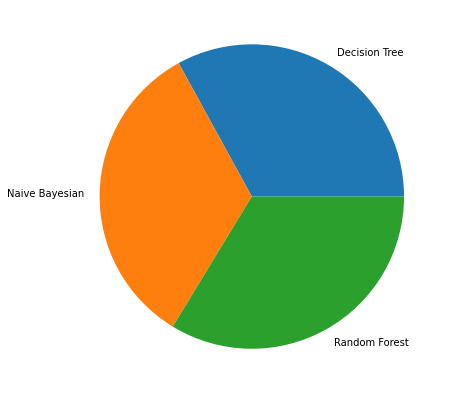

In [ ]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
Model_accuracy = ['Decision Tree','Naive Bayesian','Random Forest']
 
data = [decision_tree_acc, Naive_Bayesian_acc*100, random_forest_acc*100]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = Model_accuracy)
 
# show plot
plt.show()